In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.preprocessing import PowerTransformer

In [4]:
df = pd.read_csv('census_income.csv')
df.head(1)

,id,age,sex,race,marital_status,relationship_label,relationship,functional_weight,education,education_num,workclass,occupation,capital_gain,capital_loss,hours_per_week,native_country,country_name,target
0,1623,17,Male,White,Married-civ-spouse,0,Husband,221129,9th,5,Private,Other-service,0,0,40,39,United-States,<=50K


In [5]:
columns_to_drop = ['id', 'relationship', 'country_name']
df.drop(columns_to_drop, axis = 1, inplace = True)
df.head(1)

,age,sex,race,marital_status,relationship_label,functional_weight,education,education_num,workclass,occupation,capital_gain,capital_loss,hours_per_week,native_country,target
0,17,Male,White,Married-civ-spouse,0,221129,9th,5,Private,Other-service,0,0,40,39,<=50K


#  Label Encoder for all categorical features

## RobustScaler

In [6]:
le = LabelEncoder()
column_for_label = ['target', 'sex','race','marital_status','education','workclass','occupation']
for c in column_for_label:
    df[c] = le.fit_transform(df[c]) # transorming feature
df.head(3)

,age,sex,race,marital_status,relationship_label,functional_weight,education,education_num,workclass,occupation,capital_gain,capital_loss,hours_per_week,native_country,target
0,17,1,4,2,0,221129,6,5,4,8,0,0,40,39,0
1,17,1,4,4,3,191260,6,5,4,8,1055,0,24,39,0
2,17,1,2,4,3,32124,6,5,2,8,0,0,9,39,0


In [7]:
df.describe()

,age,sex,race,marital_status,relationship_label,functional_weight,education,education_num,workclass,occupation,capital_gain,capital_loss,hours_per_week,native_country,target
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,0.669205,3.665858,2.611836,1.446362,1.897784e+05,10.298210,10.080679,3.868892,6.572740,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,0.470506,0.848806,1.506222,1.606771,1.055500e+05,3.870264,2.572720,1.455960,4.228857,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,0.000000,4.000000,2.000000,0.000000,1.178270e+05,9.000000,9.000000,4.000000,3.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,1.000000,4.000000,2.000000,1.000000,1.783560e+05,11.000000,10.000000,4.000000,7.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,1.000000,4.000000,4.000000,3.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,1.000000,4.000000,6.000000,5.000000,1.484705e+06,15.000000,16.000000,8.000000,14.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [8]:
data_features_rs = df.iloc[:, : ]
data_features_rs.head(0)

,age,sex,race,marital_status,relationship_label,functional_weight,education,education_num,workclass,occupation,capital_gain,capital_loss,hours_per_week,native_country,target


In [9]:
# Since we are dealing with distances, you need to make sure that all data is on the same scale

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_df = pd.DataFrame(
    data=scaler.fit_transform(data_features_rs), 
    columns=data_features_rs.columns
)

In [10]:
scaled_df.describe()

,age,sex,race,marital_status,relationship_label,functional_weight,education,education_num,workclass,occupation,capital_gain,capital_loss,hours_per_week,native_country,target
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.079082,-0.330795,-0.334142,0.305918,0.148787,0.095806,-0.233930,0.026893,-0.131108,-0.061037,1077.648844,87.303830,0.087491,-2.281134,0.240810
std,0.682022,0.470506,0.848806,0.753111,0.535590,0.885308,1.290088,0.857573,1.455960,0.604122,7385.292085,402.960219,2.469486,7.823782,0.427581
min,-1.000000,-1.000000,-4.000000,-1.000000,-0.333333,-1.392933,-3.666667,-3.000000,-4.000000,-1.000000,0.000000,0.000000,-7.800000,-39.000000,0.000000
25%,-0.450000,-1.000000,0.000000,0.000000,-0.333333,-0.507691,-0.666667,-0.333333,0.000000,-0.571429,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.550000,0.000000,0.000000,1.000000,0.666667,0.492309,0.333333,0.666667,0.000000,0.428571,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.650000,0.000000,0.000000,2.000000,1.333333,10.957098,1.333333,2.000000,4.000000,1.000000,99999.000000,4356.000000,11.800000,2.000000,1.000000


### Divide data on two sets 

In [11]:
data, validation_data = train_test_split(
    scaled_df,
    test_size=0.10,
    random_state=42) # 'data' use for train,  'validation_data' use for validatoin models 

In [12]:
data.to_csv('my_data_for_clining.csv', index=False) # save as csv file
validation_data.to_csv('my_data_for_validation_models.csv', index=False)

# **EDA**

In [ ]:
data.hist(figsize=(14, 10));

In [ ]:
plt.figure(figsize=(10,10))

corr_matrix = data.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);

In [ ]:
high_corr = [
    column for column in lower.columns if any((lower[column] > 0.6)|(lower[column] < -0.6))
]
high_corr

####  We don't have features with high Correlation at Target and with each other.

In [ ]:
other_features = [col for col in df.columns if col not in high_corr and col!='target']

In [ ]:
sns.pairplot(df[other_features]);

## **Simplest methods**

### **3-sigmas** 

In [ ]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [ ]:
def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))    

In [ ]:
data_features = data.iloc[:, : -1]
data_features.head(1)

In [ ]:
comparison_table, std_outliers = get_column_outliers(data)
anomalies_report(std_outliers)

In [ ]:
comparison_table

In [ ]:
# # For vizualization , if need:

# labeled_data = data_features.copy()
# labeled_data['is_outlier'] = std_outliers

# sns.pairplot(data=labeled_data, vars = other_features,
#              hue='is_outlier', hue_order=[1, 0],
#              markers=['x', 'o'],  palette='bright');

### **Interquartile deviation**

In [ ]:
def outlier_iqr(data, col, threshold=3):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [ ]:
comparison_table, iqr_outliers = get_column_outliers(data_features, function=outlier_iqr)
anomalies_report(iqr_outliers)

## **Clusterization**

### **Distance-based** 

In [ ]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

class DistanceOutliers(BaseEstimator):
    """
    Distance based outlier detector model
    
    Fit method calculates centroid of training samples and
    using `metric` get distances from centroid to train samples.
    Having distances - we calculate `threshold` based on `percentile`.
    
    Predict method uses `threshold` and `metric` to determine, whether
    distance to sample from centroid is too large -> outlier.
    
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [ ]:
# # Since we are dealing with distances, you need to make sure that all data is on the same scale

# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# scaled_data = pd.DataFrame(
#     data=scaler.fit_transform(data_features), 
#     columns=data_features.columns
# )

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=50)
tsne_transformed = tsne.fit_transform(data)

plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1]);

In [ ]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=90)
euclidian_model.fit(data)
euclidian_outliers = euclidian_model.predict(data)
anomalies_report(euclidian_outliers)

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=euclidian_outliers);

In [ ]:
citiblock_model = DistanceOutliers(metric='cityblock', percentile=90)
citiblock_model.fit(data)
cityblock_outliers = citiblock_model.predict(data)
anomalies_report(cityblock_outliers)


plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=cityblock_outliers);

### **Density-based**


#### **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

eps = 0.05
eps_history = [eps]
while outlier_percentage>0.1:    
    model = DBSCAN(eps=eps).fit(data)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    outlier_percentage = sum(labels==1) / len(labels)    
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)
    
model = DBSCAN(eps)
model.fit(data)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [ ]:
anomalies_report(density_outlier)

In [ ]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('anomaly percentage', color=color)  # we already handled the x-label with ax1
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
# labeled_data = data_features.copy()
# labeled_data['is_outlier'] = density_outlier

# sns.pairplot(data=labeled_data, vars = other_features,
#              hue='is_outlier', hue_order=[1, 0],
#              markers=['x', 'o'],  palette='bright');

## **Unsupervised model-based**

In [ ]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=0.1, gamma='auto')
one_class_svm.fit(data)
svm_outliers = one_class_svm.predict(data)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [ ]:
anomalies_report(svm_outliers)

###  **Isolation Forest** 

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, 
                                   max_features=1.0, bootstrap=True, behaviour="new")
isolation_forest.fit(data)

isolation_outliers = isolation_forest.predict(data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [ ]:
anomalies_report(isolation_outliers)

# **Final comparison**

In [ ]:
summary = np.concatenate((
    [std_outliers], 
    [iqr_outliers], 
    [euclidian_outliers], 
    [cityblock_outliers],
    [density_outlier],
    [svm_outliers],
    [isolation_outliers]
))

In [ ]:
summary = pd.DataFrame(
    summary.T, 
    columns=['std', 'iqr', 'euclid', 'cityblock', 'dbscan', 'svm', 'isolation']
)
summary.head(3)

In [ ]:
summary.sum(axis=1).value_counts()

In [ ]:
outlier_score = summary.mean(axis=1)
plt.hist(outlier_score, alpha=0.6);

### Save MASK for cleaning outlier in File. ( filter  value < 7)

In [ ]:

summary.to_csv('my_summary_outlier_mask.csv') # save as csv file (sum.Max = 7)

## **All combined**

In [ ]:
simple_score = outlier_score.apply(lambda x: 0 if x < 0.4 else 0.5 if x < 0.8 else 1)

labeled_data = data_features.copy()
labeled_data['outlier_score'] = simple_score

custom_palette = {0:'g', 0.5:'b', 1.0:'r'}

sns.pairplot(data=labeled_data, vars=other_features, 
             hue='outlier_score',
             hue_order=[1, 0.5, 0],
             palette=custom_palette
)

## **Just model based**

In [ ]:
outliers_score_model_based = summary[['dbscan', 'svm', 'isolation']].sum(axis=1)
plt.hist(outliers_score_model_based, alpha=0.6);
outliers_score_model_based.value_counts()

In [ ]:
labeled_data = data_features.copy()
labeled_data['outlier_score'] = outliers_score_model_based

custom_palette = {0:'g', 1:'y', 2:'b', 3:'r'}

sns.pairplot(data=labeled_data, vars=other_features, 
             hue='outlier_score',
             hue_order=[3, 2, 1, 0],
             palette=custom_palette
)

In [27]:
summary = pd.read_csv('my_summary_outlier_mask.csv')
summary.head()

,Unnamed: 0,std,iqr,euclid,cityblock,dbscan,svm,isolation
0,0,0,1,0,0,0,0,0
1,1,1,1,1,1,1,1,1
2,2,0,0,0,0,0,0,0
3,3,0,1,0,0,0,0,0
4,4,0,0,0,0,0,0,0


In [28]:
summary.shape, data.shape

((29304, 8), (29304, 15))

In [29]:
summary.drop('Unnamed: 0', axis = 1, inplace = True)

In [31]:
summary.sum(axis=1).value_counts()

0    11999
1     9893
2     2399
3     1934
4     1108
5     1004
7      489
6      478
dtype: int64

In [32]:
mask_clear_all = summary.sum(axis=1) < 6

In [35]:
mask_clear_all

0         True
1        False
2         True
3         True
4         True
         ...  
29299     True
29300     True
29301     True
29302     True
29303     True
Length: 29304, dtype: bool

In [34]:
data[mask_clear_all]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
# df[mask_clear_all]

In [ ]:
# mask_clear_model = outliers_score_model_based < 3

In [ ]:
# mask_clear_model.value_counts()

In [ ]:
# df[mask_clear_model]

In [ ]:
# data

#  Data for modeling

In [13]:
X_df = data.drop(['target'], axis = 1)
y_df = data['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_df,
    y_df,
    test_size=0.20,
    random_state=42)

## RandomForest Base model

In [15]:
model_rf = RandomForestClassifier(oob_score=True)
model_rf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_pred = model_rf.predict(X_test)

In [17]:
# accuracy score for base model (without hyperparameters tuning)

y_pred_rf = model_rf.predict(X_test)

# calculate the AUC
y_pred_prob_rf = model_rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob_rf[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

print("Sklearn RandomForest Classifier :")
print('----------------------------')
print(f" - ROC AUC _score: {roc_auc: .5f}")
print('----------------------------')
print(f" - accuracy_score: {accuracy_score(y_test, y_pred_rf): .5f}")
print(f" - f1_score: {f1_score(y_test, y_pred_rf): .5f}")

Sklearn RandomForest Classifier :
----------------------------
 - ROC AUC _score:  0.88306
----------------------------
 - accuracy_score:  0.85327
 - f1_score:  0.65710


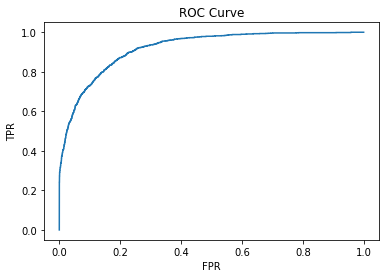

In [24]:
plt.step(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [25]:
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1] 

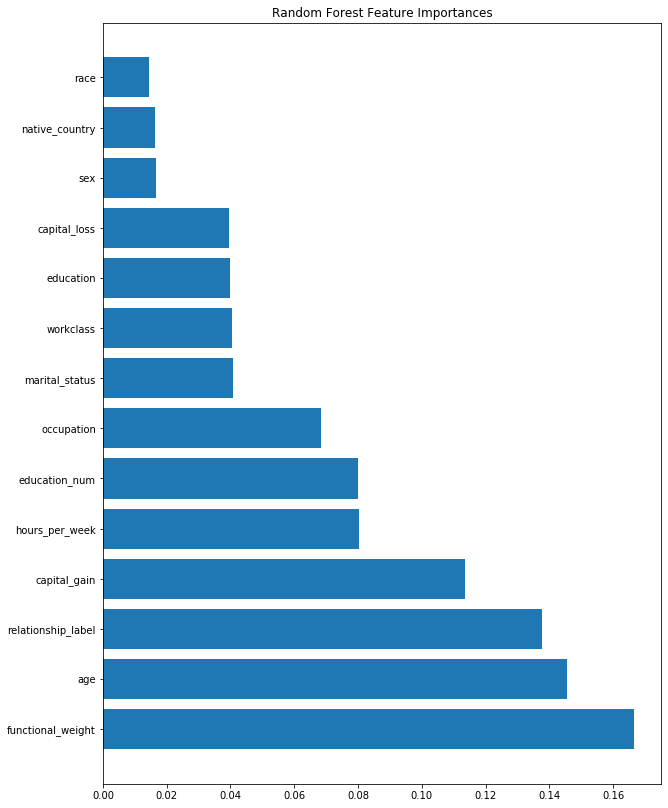

In [26]:
plt.figure(figsize=(10,14))
plt.barh(X_train.columns[indices], importances[indices])
plt.title('Random Forest Feature Importances')
plt.show()

###  RandomForestClassifier + GridSearchCV

In [ ]:
parameters = {
    'bootstrap': [True], 
    'criterion': ['gini', 'entropy'],
    'n_estimators' : [200, 210, 220],
    'max_depth': list(range( 10, 15 ))}

In [ ]:
base_model = RandomForestClassifier()
gs_model = GridSearchCV(
    base_model, 
    parameters, 
    verbose=False,
    scoring='roc_auc')

In [ ]:
gs_model.fit(X_train, y_train)

In [ ]:
gs_model.best_params_

In [ ]:
gs_model.best_score_

In [ ]:
gs_model.best_estimator_

In [ ]:
y_pred_gs = gs_model.predict(X_test)

In [ ]:
# accuracy score for model with GS

y_pred_gs = gs_model.predict(X_test)

# calculate the AUC
y_pred_prob_gs = gs_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob_gs[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

print("Sklearn RandomForest Classifier :")
print('----------------------------')
print(f" - ROC AUC _score: {roc_auc: .5f}")
print('----------------------------')
print(f" - accuracy_score: {accuracy_score(y_test, y_pred_gs): .5f}")
print(f" - f1_score: {f1_score(y_test, y_pred_gs): .5f}")

## Bagging

In [ ]:
clf_bagging = BaggingClassifier(n_estimators=120)

In [ ]:
clf_bagging.fit(X_train, y_train)
y_pred_bagging = clf_bagging.predict(X_test)

# calculate the AUC
y_pred_prob_bagging = clf_bagging.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob_bagging[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

print("Sklearn Bagging classifier:")
print('----------------------------')
print(f" - ROC AUC _score: {roc_auc: .5f}")
print('----------------------------')
print(f" - accuracy_score: {accuracy_score(y_test, y_pred_bagging): .5f}")
print(f" - f1_score: {f1_score(y_test, y_pred_bagging): .5f}")

###  AdaBoostClassifier 

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Adaboost
clf_ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=150,
    learning_rate=1.2
)

In [20]:
clf_ada.fit(X_train, y_train)
y_pred_ada = clf_ada.predict(X_test)

# calculate the AUC
y_pred_prob_ada = clf_ada.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob_ada[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

print("Sklearn AdaBoost classifier:")
print('----------------------------')
print(f" - ROC AUC _score: {roc_auc: .5f}")
print('----------------------------')
print(f" - accuracy_score: {accuracy_score(y_test, y_pred_ada): .5f}")
print(f" - f1_score: {f1_score(y_test, y_pred_ada): .5f}")

Sklearn AdaBoost classifier:
----------------------------
 - ROC AUC _score:  0.91944
----------------------------
 - accuracy_score:  0.87050
 - f1_score:  0.70130


### SVM

In [ ]:
from sklearn.svm import SVC as svm
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# clf = svm(C=1, kernel='rbf', gamma= 'auto', probability=True)
clf = svm(probability=True)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred_svm = clf.predict(X_test)

#calculate the AUC
y_pred_prob_svm = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob_svm[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

print("Sklearn SVClassifier:")
print('----------------------------')
print(f" - ROC AUC _score: {roc_auc: .5f}")
print('----------------------------')
print(f" - accuracy_score: {accuracy_score(y_test, y_pred_svm): .5f}")
print(f" - f1_score: {f1_score(y_test, y_pred_svm): .5f}")

### XGBoost

In [21]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [22]:
clf_xgb = xgb.XGBClassifier(n_estimators=406, gamma=0.2)
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=406, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [23]:
# clf_xgb = xgb.XGBClassifier(n_estimators=406, gamma=0.2)
# clf_xgb.fit(X_train, y_train)

y_pred_xgb = clf_xgb.predict(X_test)

y_pred_prob_xgb = clf_xgb.predict_proba(X_test)

print("XGBoost classifier:")
print('--------------------------')
print(f" - ROC AUC _score: {roc_auc_score(y_test, y_pred_prob_xgb[:,1]): .5f}")
print('--------------------------')
print(f" - accuracy_score: {accuracy_score(y_test, y_pred_xgb): .5f}")
print(f" - f1_score: {f1_score(y_test, y_pred_xgb): .5f}")

XGBoost classifier:
--------------------------
 - ROC AUC _score:  0.92340
--------------------------
 - accuracy_score:  0.87238
 - f1_score:  0.70223


### Model for tuninng Hyperparams

In [ ]:
# clf_xgb = XGBClassifier(
#     learning_rate =0.1,
#     n_estimators=100,
#     max_depth=6,
#     min_child_weight=8,
#     gamma=0.,
#     subsample=0.65,
#     colsample_bytree=0.85,
#     objective= 'binary:logistic',
#     validation_fraction = 0.1,
#     scale_pos_weight=1,
#     seed=42)


# clf_xgb.fit(X_train, y_train)

# y_pred_xgb = clf_xgb.predict(X_test)

# y_pred_prob_xgb = clf_xgb.predict_proba(X_test)

# print("XGBoost classifier:")
# print('----------------------------')
# print(f" - ROC AUC _score: {roc_auc_score(y_test, y_pred_prob_xgb[:,1]): .5f}")
# print('----------------------------')
# print(f" - accuracy_score: {accuracy_score(y_test, y_pred_xgb): .5f}")
# print(f" - f1_score: {f1_score(y_test, y_pred_xgb): .5f}")

#  Check XGBoost on raw validation_data

In [ ]:
X_df = validation_data.drop(['target'], axis = 1)
y_df = validation_data['target']

In [ ]:
clf_xgb = xgb.XGBClassifier(n_estimators=406, gamma=0.2)
clf_xgb.fit(X_train, y_train)

In [ ]:
# clf_xgb = xgb.XGBClassifier(n_estimators=406, gamma=0.2)
# clf_xgb.fit(X_train, y_train)

y_pred_xgb = clf_xgb.predict(X_df)

y_pred_prob_xgb = clf_xgb.predict_proba(X_df)

print("XGBoost classifier:")
print('--------------------------')
print(f" - ROC AUC _score: {roc_auc_score(y_df, y_pred_prob_xgb[:,1]): .5f}")
print('--------------------------')
print(f" - accuracy_score: {accuracy_score(y_df, y_pred_xgb): .5f}")
print(f" - f1_score: {f1_score(y_df, y_pred_xgb): .5f}")